In [33]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
gmaps.configure(api_key=gkey)

In [ ]:
%matplotlib inline

In [34]:
# Generating random Brewery IDs

brewery_id = []

for x in range(1000):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Gathered {len(unique_id)} unique Brewery IDs.")

Gathered 918 unique Brewery IDs.


In [35]:
# Retrieving Raw Brewery Data
brewery_df = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        brewery_df.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/918) Retrieved Brewery ID 5753...
(2/918) Retrieved Brewery ID 2972...
(3/918) Retrieved Brewery ID 5859...
(4/918) Retrieved Brewery ID 501...
(5/918) Retrieved Brewery ID 3800...
(6/918) Retrieved Brewery ID 1129...
(7/918) Retrieved Brewery ID 3031...
(8/918) Retrieved Brewery ID 5380...
(9/918) Retrieved Brewery ID 4167...
(10/918) Retrieved Brewery ID 3370...
(11/918) Retrieved Brewery ID 5362...
(12/918) Retrieved Brewery ID 1812...
(13/918) Retrieved Brewery ID 3894...
(14/918) Retrieved Brewery ID 1007...
(15/918) Retrieved Brewery ID 2102...
(16/918) Retrieved Brewery ID 2565...
(17/918) Retrieved Brewery ID 3181...
(18/918) Retrieved Brewery ID 2941...
(19/918) Retrieved Brewery ID 166...
(20/918) Retrieved Brewery ID 275...
(21/918) Retrieved Brewery ID 1241...
(22/918) Retrieved Brewery ID 2785...
(23/918) Retrieved Brewery ID 3569...
(24/918) Retrieved Brewery ID 1726...
(25/918) Retrieved Brewery ID 5483...
(26/918) Retrieved Brewery ID 5965...
(27/918) Retrieved Brewe

(216/918) Retrieved Brewery ID 3871...
(217/918) Retrieved Brewery ID 3965...
(218/918) Retrieved Brewery ID 658...
(219/918) Retrieved Brewery ID 513...
(220/918) Retrieved Brewery ID 4617...
(221/918) Retrieved Brewery ID 3549...
(222/918) Retrieved Brewery ID 3498...
(223/918) Retrieved Brewery ID 3809...
(224/918) Retrieved Brewery ID 5227...
(225/918) Retrieved Brewery ID 515...
(226/918) Retrieved Brewery ID 3455...
(227/918) Retrieved Brewery ID 42...
(228/918) Retrieved Brewery ID 2975...
(229/918) Retrieved Brewery ID 4399...
(230/918) Retrieved Brewery ID 1191...
(231/918) Retrieved Brewery ID 5911...
(232/918) Retrieved Brewery ID 3123...
(233/918) Retrieved Brewery ID 5722...
(234/918) Retrieved Brewery ID 2542...
(235/918) Retrieved Brewery ID 1587...
(236/918) Retrieved Brewery ID 2887...
(237/918) Retrieved Brewery ID 4661...
(238/918) Retrieved Brewery ID 1739...
(239/918) Retrieved Brewery ID 246...
(240/918) Retrieved Brewery ID 2770...
(241/918) Retrieved Brewery ID 

(427/918) Retrieved Brewery ID 5188...
(428/918) Retrieved Brewery ID 2237...
(429/918) Retrieved Brewery ID 5713...
(430/918) Retrieved Brewery ID 4238...
(431/918) Retrieved Brewery ID 2281...
(432/918) Retrieved Brewery ID 3594...
(433/918) Retrieved Brewery ID 2191...
(434/918) Retrieved Brewery ID 4094...
(435/918) Retrieved Brewery ID 1313...
(436/918) Retrieved Brewery ID 5130...
(437/918) Retrieved Brewery ID 4935...
(438/918) Retrieved Brewery ID 3921...
(439/918) Retrieved Brewery ID 2227...
(440/918) Retrieved Brewery ID 4119...
(441/918) Retrieved Brewery ID 2029...
(442/918) Retrieved Brewery ID 3074...
(443/918) Retrieved Brewery ID 3836...
(444/918) Retrieved Brewery ID 183...
(445/918) Retrieved Brewery ID 3029...
(446/918) Retrieved Brewery ID 2103...
(447/918) Retrieved Brewery ID 301...
(448/918) Retrieved Brewery ID 2297...
(449/918) Retrieved Brewery ID 5833...
(450/918) Retrieved Brewery ID 4384...
(451/918) Retrieved Brewery ID 5426...
(452/918) Retrieved Brewery

(638/918) Retrieved Brewery ID 1969...
(639/918) Retrieved Brewery ID 1153...
(640/918) Retrieved Brewery ID 4564...
(641/918) Retrieved Brewery ID 470...
(642/918) Retrieved Brewery ID 2186...
(643/918) Retrieved Brewery ID 887...
(644/918) Retrieved Brewery ID 1547...
(645/918) Retrieved Brewery ID 3288...
(646/918) Retrieved Brewery ID 2169...
(647/918) Retrieved Brewery ID 1590...
(648/918) Retrieved Brewery ID 2295...
(649/918) Retrieved Brewery ID 4006...
(650/918) Retrieved Brewery ID 4344...
(651/918) Retrieved Brewery ID 1250...
(652/918) Retrieved Brewery ID 2735...
(653/918) Retrieved Brewery ID 3646...
(654/918) Retrieved Brewery ID 16...
(655/918) Retrieved Brewery ID 2537...
(656/918) Retrieved Brewery ID 3222...
(657/918) Retrieved Brewery ID 4557...
(658/918) Retrieved Brewery ID 655...
(659/918) Retrieved Brewery ID 5144...
(660/918) Retrieved Brewery ID 3956...
(661/918) Retrieved Brewery ID 4605...
(662/918) Retrieved Brewery ID 64...
(663/918) Retrieved Brewery ID 5

(850/918) Retrieved Brewery ID 2198...
(851/918) Retrieved Brewery ID 1798...
(852/918) Retrieved Brewery ID 1410...
(853/918) Retrieved Brewery ID 3934...
(854/918) Retrieved Brewery ID 281...
(855/918) Retrieved Brewery ID 812...
(856/918) Retrieved Brewery ID 2418...
(857/918) Retrieved Brewery ID 605...
(858/918) Retrieved Brewery ID 3038...
(859/918) Retrieved Brewery ID 5812...
(860/918) Retrieved Brewery ID 1679...
(861/918) Retrieved Brewery ID 288...
(862/918) Retrieved Brewery ID 1657...
(863/918) Retrieved Brewery ID 2857...
(864/918) Retrieved Brewery ID 1282...
(865/918) Retrieved Brewery ID 1135...
(866/918) Retrieved Brewery ID 5864...
(867/918) Retrieved Brewery ID 2394...
(868/918) Retrieved Brewery ID 1882...
(869/918) Retrieved Brewery ID 4754...
(870/918) Retrieved Brewery ID 724...
(871/918) Retrieved Brewery ID 4630...
(872/918) Retrieved Brewery ID 2927...
(873/918) Retrieved Brewery ID 5215...
(874/918) Retrieved Brewery ID 5425...
(875/918) Retrieved Brewery ID

In [4]:
# Creating DataFrame
brewery_df = pd.DataFrame(brewery_df)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,brewpub,Mt Pleasant,United States,3618,43.604568,-84.7822205,Mountain Town Station Restaurant & Brew Pub,9894004666,48858-2441,Michigan,506 W Broadway St,2018-08-24T00:43:38.551Z,http://www.mountaintownbrew.com
1,planning,Salem,United States,4337,None,None,Outland Brewing Company,,03079-1867,New Hampshire,,2018-08-11T21:38:20.507Z,
2,micro,Concord,United States,5082,None,None,Commoners Brewing Company,7048866002,28025,North Carolina,1048 Copperfield Blvd Ste 101,2018-08-11T21:38:47.113Z,http://www.commonersbrewingcompany.com
3,brewpub,Valparaiso,United States,2625,None,None,Figure Eight Brewing Co,2194772000,46383-5507,Indiana,150 Washington St,2018-08-11T21:37:19.054Z,http://www.figureeightbrewing.com
4,micro,Chicago,United States,2308,41.7595502,-87.6572069,5 Rabbit Cerveceria Inc,3128959591,60638-6129,Illinois,6398 W 74th St,2018-08-24T00:30:23.637Z,http://www.5rabbitbrewery.com


In [5]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 608 breweries from DataFrame which did not have coordinates.
Total Brewery count: 298


In [6]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
0,43.604568,-84.782220
4,41.759550,-87.657207
5,40.573795,-105.115181
6,40.859724,-81.418676
7,38.440105,-105.241811


In [7]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [9]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/298) Mt Pleasant weather data found...
(2/298) Chicago weather data found...
(3/298) Fort Collins weather data found...
(4/298) Canton weather data found...
(5/298) Canon City weather data found...
(6/298) Albuquerque weather data found...
(7/298) Newburgh weather data found...
(8/298) Decatur weather data found...
(9/298) Portland weather data found...
(10/298) Alamosa weather data found...
(11/298) Rehoboth Beach weather data found...
(12/298) Portland weather data found...
(13/298) Patchogue weather data found...
(14/298) Wyandotte weather data found...
(15/298) Buffalo weather data found...
(16/298) Rome weather data found...
(17/298) Julian weather data found...
(18/298) Fairview weather data found...
(19/298) Tucson weather data found...
(20/298) Iowa City weather data found...
(21/298) Plainfield weather data found...
(22/298) Clackamas weather data found...
(23/298) Montrose weather data found...
(24/298) Norco weather data found...
(25/298) Santa Rosa weather data found...


(204/298) Wildomar weather data found...
(205/298) Warren weather data found...
(206/298) Ottawa weather data found...
(207/298) Banner Elk weather data found...
(208/298) Miami weather data found...
(209/298) Saratoga Springs weather data found...
(210/298) Fayetteville weather data found...
(211/298) Avon weather data found...
(212/298) Defiance weather data found...
(213/298) Davenport weather data found...
(214/298) Reno weather data found...
(215/298) Moscow weather data found...
(216/298) Bellevue weather data found...
(217/298) Clinton Township not found... skipping
(218/298) Hood River weather data found...
(219/298) Montevideo weather data found...
(220/298) Monrovia weather data found...
(221/298) Clarence weather data found...
(222/298) Ellicottville weather data found...
(223/298) Collingswood weather data found...
(224/298) Billings weather data found...
(225/298) Charlotte weather data found...
(226/298) Bridgman weather data found...
(227/298) San Francisco weather data 

In [15]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df.head()

,city,temp
0,Mt Pleasant,59.00
1,Chicago,86.00
2,Fort Collins,41.54
3,Canton,84.92
4,Canon City,55.37


In [13]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/298) Found rating for Mountain Town Station Restaurant & Brew Pub...
(2/298) Could not find rating for 5 Rabbit Cerveceria Inc...
(3/298) Found rating for McClellan's Brewing Company...
(4/298) Found rating for Fat Head's Brewpub - Canton...
(5/298) Found rating for Royal Gorge Brew Pub...
(6/298) Found rating for Bistronomy B2B Craft Brewery...
(7/298) Found rating for Newburgh Brewing Company...
(8/298) Found rating for Final Gravity Brewing Co...
(9/298) Found rating for Gigantic Brewing Co...
(10/298) Found rating for Square Peg Brewerks...
(11/298) Found rating for Iron Hill Brewery & Restaurant - Rehoboth Beach...
(12/298) Could not find rating for Pono Brewing Company...
(13/298) Found rating for Brick House Brewery and Restaurant...
(14/298) Could not find rating for Sports Brewpub...
(15/298) Found rating for Gene McCarthy's/Old First Ward Brewing Company...
(16/298) Found rating for Copper City Brewing Company...
(17/298) Found rating for Julian Brewing Co...
(18/298) Foun

(150/298) Found rating for Sonoran Brewing...
(151/298) Found rating for Irish Mafia Brewing Co...
(152/298) Found rating for Wages Brewing Company...
(153/298) Found rating for Shady Oak Barrel House...
(154/298) Found rating for Vino's Pizza Pub Brewery...
(155/298) Zero rating for Cerveceria Del Pueblo...
(156/298) Found rating for Madewest Brewing Company...
(157/298) Found rating for BearWaters Brewing Co...
(158/298) Found rating for Natty Greene's Pub & Brewing Co...
(159/298) Found rating for Bold Missy Brewery...
(160/298) Found rating for The Shop Beer Co....
(161/298) Found rating for Dog Rose Brewing Company...
(162/298) Found rating for Los Angeles Ale Works...
(163/298) Found rating for Tortugo Brewing Company...
(164/298) Found rating for Two Monks Brewing Company...
(165/298) Found rating for Hansa Brewery...
(166/298) Found rating for Flapjack Brewery...
(167/298) Found rating for Northern Row Brewery & Distillery...
(168/298) Found rating for Riley's Brew Pub...
(169/

In [16]:
ratings_df = pd.DataFrame(ratings)
ratings_df.head()

,name,rating
0,Mountain Town Station Restaurant & Brew Pub,4.3
1,McClellan's Brewing Company,4.6
2,Fat Head's Brewpub - Canton,4.4
3,Royal Gorge Brew Pub,3.8
4,Bistronomy B2B Craft Brewery,4.0


In [17]:
#Merging Data Frames
brewery_temp = pd.merge(brewery_df,temp_df, on = 'city')
brewery_temp.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url,temp
0,brewpub,Mt Pleasant,United States,3618,43.604568,-84.7822205,Mountain Town Station Restaurant & Brew Pub,9894004666,48858-2441,Michigan,506 W Broadway St,2018-08-24T00:43:38.551Z,http://www.mountaintownbrew.com,59.0
1,micro,Chicago,United States,2308,41.7595502,-87.6572069,5 Rabbit Cerveceria Inc,3128959591,60638-6129,Illinois,6398 W 74th St,2018-08-24T00:30:23.637Z,http://www.5rabbitbrewery.com,86.0
2,micro,Chicago,United States,2308,41.7595502,-87.6572069,5 Rabbit Cerveceria Inc,3128959591,60638-6129,Illinois,6398 W 74th St,2018-08-24T00:30:23.637Z,http://www.5rabbitbrewery.com,86.0
3,micro,Chicago,United States,2308,41.7595502,-87.6572069,5 Rabbit Cerveceria Inc,3128959591,60638-6129,Illinois,6398 W 74th St,2018-08-24T00:30:23.637Z,http://www.5rabbitbrewery.com,86.0
4,brewpub,Chicago,United States,2323,41.9675954,-87.6750827,Band Of Bohemia,7732714710,60640-4408,Illinois,4710 N Ravenswood Ave,2018-08-24T00:30:30.769Z,http://bandofbohemia.com,86.0


In [18]:
Brewery_temp_rating = pd.merge(brewery_temp, ratings_df, on="name")
B_T_R = Brewery_temp_rating[['brewery_type','name','state', 'city','temp','rating']]
B_T_R.head()

,brewery_type,name,state,city,temp,rating
0,brewpub,Mountain Town Station Restaurant & Brew Pub,Michigan,Mt Pleasant,59.0,4.3
1,brewpub,Band Of Bohemia,Illinois,Chicago,86.0,4.6
2,brewpub,Band Of Bohemia,Illinois,Chicago,86.0,4.6
3,brewpub,Band Of Bohemia,Illinois,Chicago,86.0,4.6
4,micro,Maplewood Brewing Company,Illinois,Chicago,86.0,4.8


In [20]:
Brewery_Temp_Ratings=B_T_R.drop_duplicates(keep=False).shape
Brewery_Temp_Ratings

(182, 6)

In [74]:
Brewery_Types=B_T_R.drop_duplicates('name')
Brewery_Type = Brewery_Types.rename(columns = {'brewery_type':'Brewery Type','name':'Brewery Company','state':'States','city':'City','temp':'Current Temperature','rating':'Brewery Companies Ratings' })
Brewery_Type.head()

,Brewery Type,Brewery Company,States,City,Current Temperature,Brewery Companies Ratings
0,brewpub,Mountain Town Station Restaurant & Brew Pub,Michigan,Mt Pleasant,59.00,4.3
1,brewpub,Band Of Bohemia,Illinois,Chicago,86.00,4.6
4,micro,Maplewood Brewing Company,Illinois,Chicago,86.00,4.8
7,brewpub,McClellan's Brewing Company,Colorado,Fort Collins,41.54,4.6
9,brewpub,Three Four Beer Company,Colorado,Fort Collins,41.54,4.5


In [230]:
Brewery_groups = Brewery_Type.groupby(['Brewery Type','States','Brewery Companies Ratings'])
#Count_Group= pd.DataFrame(Brewery_groups).reset_index()
Count_Group = Count_Group.count()
Count_Group.head()


Brewery Type                 185
States                       185
Brewery Companies Ratings    185
dtype: int64

In [227]:
#Convert all count_group to list
#count_group['Brewery Type'].tolist()
#count_group['States'].tolist()
#count_group['Brewery Companies Ratings'].tolist()
Count_Group= pd.DataFrame(count_group).reset_index()
Count_Group.head()

,Brewery Type,States,Brewery Companies Ratings
0,brewpub,Alaska,4.6
1,brewpub,Arizona,4.4
2,brewpub,Arkansas,3.7
3,brewpub,Arkansas,4.1
4,brewpub,Arkansas,4.5


In [244]:
count_group.head()

Empty DataFrame
Columns: []
Index: [(brewpub, Alaska, 4.6), (brewpub, Arizona, 4.4), (brewpub, Arkansas, 3.7), (brewpub, Arkansas, 4.1), (brewpub, Arkansas, 4.5)]

In [250]:
State_Ratings = Brewery_Type.groupby("States")["Brewery Companies Ratings"].mean()
State_Ratings = round(State_Ratings,1)
State_Ratings = pd.DataFrame(State_Ratings).reset_index()
State_Ratings.head()


,States,Brewery Companies Ratings
0,Alabama,4.7
1,Alaska,4.6
2,Arizona,4.5
3,Arkansas,4.2
4,California,4.5


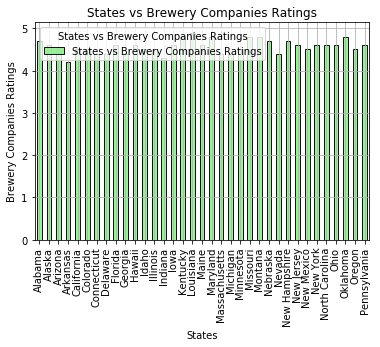

In [257]:
# Bar chart of State vs Brewery Companies Rating
axis8 = State_Ratings.plot(kind="bar",x="States", y="Brewery Companies Ratings",
                       color="lightgreen", label = "States vs Brewery Companies Ratings",
                       alpha = 0.9, edgecolor = "black")
#State_Ratings.plot(kind = 'bar', figsize=(10, 6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("States vs Brewery Companies Ratings")
plt.xlabel("States")
plt.ylabel("Brewery Companies Ratings")
plt.legend(title = 'States vs Brewery Companies Ratings')
plt.grid(True)
plt.show()
#alpha = 0.9

In [177]:
Average_Ratings = Brewery_Type.groupby("Brewery Type")["Brewery Companies Ratings"].mean()
Average_Ratings = round(Average_Ratings,1)
Average_Ratings = pd.DataFrame(Average_Ratings).reset_index()
Average_Ratings



,Brewery Type,Brewery Companies Ratings
0,brewpub,4.4
1,contract,4.5
2,large,4.6
3,micro,4.6
4,planning,4.6
5,proprietor,4.8
6,regional,4.6


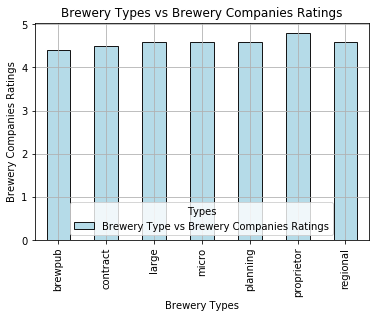

In [242]:
axis8 = Average_Ratings.plot(kind="bar",x="Brewery Type", y="Brewery Companies Ratings",
                       color="lightblue", label = "Brewery Type vs Brewery Companies Ratings", 
                       alpha = 0.9, edgecolor = "black")
plt.title("Brewery Types vs Brewery Companies Ratings")
plt.xlabel("Brewery Types")
plt.ylabel("Brewery Companies Ratings")
plt.legend(title = 'Types')
plt.grid(True)
plt.show()

In [81]:
Total_Companies = Brewery_Type.groupby("Brewery Type")["Brewery Company"].count()
Total_Companies = pd.DataFrame(Total_Companies).reset_index()
Total_Companies


,Brewery Type,Brewery Company
0,brewpub,101
1,contract,5
2,large,1
3,micro,138
4,planning,4
5,proprietor,4
6,regional,1


In [176]:
Average_Temperature = Brewery_Type.groupby("Brewery Type")["Current Temperature"].mean()
Average_Temperature = round(Average_Temperature,1)
Average_Temperature = pd.DataFrame(Average_Temperature).reset_index()
Average_Temperature


,Brewery Type,Current Temperature
0,brewpub,72.0
1,contract,78.8
2,large,75.0
3,micro,72.3
4,planning,66.4
5,proprietor,69.0
6,regional,59.0


In [178]:
#Merging The Average_Tem, Average_Rat, Total_Brewery
Brewery_Merge_df = pd.merge(Average_Ratings,Average_Temperature,on="Brewery Type", how='inner')
Brewery_Merge_df

,Brewery Type,Brewery Companies Ratings,Current Temperature
0,brewpub,4.4,72.0
1,contract,4.5,78.8
2,large,4.6,75.0
3,micro,4.6,72.3
4,planning,4.6,66.4
5,proprietor,4.8,69.0
6,regional,4.6,59.0


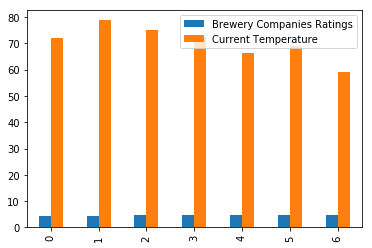

In [195]:
Brewery_Merge_df.plot.bar()

In [179]:
Brewery_Type_Merge_df = pd.merge(Brewery_Merge_df,Total_Companies,on="Brewery Type", how='inner')
Brewery_Type_Merge_df

,Brewery Type,Brewery Companies Ratings,Current Temperature,Brewery Company
0,brewpub,4.4,72.0,101
1,contract,4.5,78.8,5
2,large,4.6,75.0,1
3,micro,4.6,72.3,138
4,planning,4.6,66.4,4
5,proprietor,4.8,69.0,4
6,regional,4.6,59.0,1


In [ ]:
#BTR_loc = Brewery_Type_Merge_df.loc[:,Brewery Companies Ratings]
#BTR_loc

In [109]:
# Obtain the x and y coordinates for each of the seven Brewery Types
Brewery_brewpub = Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "brewpub"]
Brewery_contract = Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "contract"]
Brewery_large = Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "large"]
Brewery_micro = Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "micro"]
Brewery_planning = Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "planning"]
Brewery_proprietor= Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "proprietor"]
Brewery_regional= Brewery_Type_Merge_df.loc[Brewery_Type_Merge_df["Brewery Type"] == "regional"]

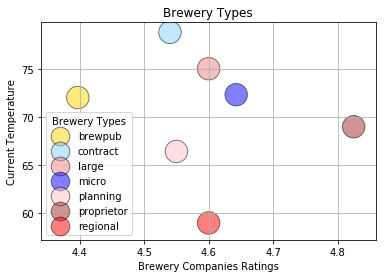

In [180]:
#Bubble Plot for each city types
axis1 = Brewery_brewpub.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="gold", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "brewpub", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
axis2 = Brewery_contract.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="Lightskyblue", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "contract", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=axis1)    
axis3 = Brewery_large.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="Lightcoral", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "large", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=axis1)
axis4 = Brewery_micro.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="blue", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "micro", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=axis1)    
axis5 = Brewery_planning.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="pink", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "planning", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=axis1)    
axis6 = Brewery_proprietor.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="brown", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "proprietor", 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=axis1)
axis7 = Brewery_regional.plot(kind="scatter",x="Brewery Companies Ratings", y="Current Temperature",
                       color="red", s=Brewery_Type_Merge_df["Brewery Company"]*5, label = "regional", 
                       alpha = 0.5, edgecolor = "black", linewidths= 1, ax=axis1)
plt.title("Brewery Types")
plt.xlabel("Brewery Companies Ratings")
plt.ylabel("Current Temperature")
plt.legend(title = 'Brewery Types')
plt.grid(True)
plt.show()









In [181]:
State_Ratings = Brewery_Type.groupby("States")["Brewery Companies Ratings"].mean()
State_Ratings = round(State_Ratings,1)
State_Ratings = pd.DataFrame(State_Ratings).reset_index()
State_Ratings.head()


,States,Brewery Companies Ratings
0,Alabama,4.7
1,Alaska,4.6
2,Arizona,4.5
3,Arkansas,4.2
4,California,4.5


In [182]:
Company_by_States = Brewery_Type.groupby("States")["Brewery Company"].count()
Company_by_States  = pd.DataFrame(Company_by_States).reset_index()
Company_by_States.head()


,States,Brewery Company
0,Alabama,1
1,Alaska,1
2,Arizona,7
3,Arkansas,4
4,California,43


In [183]:
Company_Ratings = pd.merge(Company_by_States,State_Ratings, on="States")
#Company_Ratings  = pd.DataFrame(Comapany_Ratings).reset_index()
Company_Ratings.head()

,States,Brewery Company,Brewery Companies Ratings
0,Alabama,1,4.7
1,Alaska,1,4.6
2,Arizona,7,4.5
3,Arkansas,4,4.2
4,California,43,4.5


In [184]:
State_Comp_Ratings = Company_Ratings.set_index("States")
State_Comp_Ratings.head()

,Brewery Company,Brewery Companies Ratings
States,,
Alabama,1,4.7
Alaska,1,4.6
Arizona,7,4.5
Arkansas,4,4.2
California,43,4.5


In [191]:
#SCR_list = State_Comp_Ratings['States','Brewery Companies Ratings'].tolist()
#SCR_list
SCR_loc =State_Comp_Ratings.loc[:, "Brewery Companies Ratings"] 
type(SCR_loc)

pandas.core.series.Series

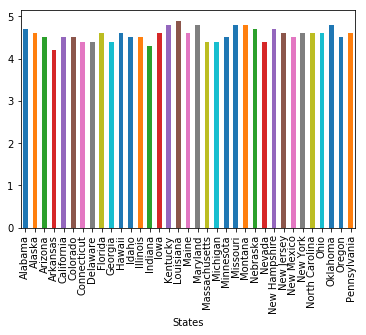

In [190]:
SCR_loc.plot.bar()

In [194]:
#BTR_loc = Brewery_Type_Merge_df.loc[:,["Brewery Type","Brewery Companies Ratings"]]
#BTR_loc


In [34]:
#Merging Data Frames
#brewery_temp = brewery_df.merge(brewery_df,temp_df, on = 'city') 
# brewery_and_temp
#brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp']]
#brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
#dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
#dataset_clean1 = dataset_clean.drop_duplicates('name')
#dataset_clean2 = dataset_clean1.set_index('name')
#dataset_clean2